In [94]:
import numpy as np
from scipy.sparse import lil_matrix
from pprint import pprint
import mpmath as mp

In [95]:
def build_hamiltonian(L, xi):
    """
    Build the Hamiltonian matrix for a 1D chain with disorder.

    Parameters:
    L (int): Length of the chain.
    xi (float): potential gradient.

    Returns:
    scipy.sparse.lil_matrix: The Hamiltonian matrix in sparse format.
    """
    def idx(n):
        return n + L - 1
    
    H = lil_matrix((2*L, 2*L), dtype=np.float64)

    for n in range(0,2*L):
        # Hopping terms
        i = idx(n )
        j = idx(n )
        H[i, j] += -0.5
        
    # On-site disorder
    for n in range(0,2*L ):
        i = idx(n) 
        H[i, i] = np.float128((i - 0.5 - L) / xi)

    return H.tocsr()


In [96]:
# ensure Hamiltonian and eigen computations use double precision (float64)
Hamiltonian = build_hamiltonian(10, np.float128(5.0)).astype(np.float128)  # sparse CSR float64
H_dense = Hamiltonian.toarray().astype(np.float128)  # dense float64 for eigh

evals, evecs = np.linalg.eigh(H_dense)plt.figure(figsize=(10, 6))
plt.plot(np.arange(20), np.diag(Hamilton_build(10, 5.0)), marker='o', linestyle='-')
plt.xticks(ticks=np.arange(20), labels=np.arange(-10 + 1, 10 + 1))
plt.xlabel('Site index')
plt.ylabel('Diagonal element')
plt.title('Hamiltonian diagonal (L=10, xi=5.0)')
plt.grid(True)
plt.tight_layout()
plt.show()
# order eigenvectors by their corresponding eigenvalues (ascending)
idx = np.argsort(evals)
evals = evals[idx]
evecs = evecs[:, idx]
num_negative_eigvals = np.sum(evals < 0)
#print("Number of negative eigenvalues:", num_negative_eigvals)
correlation_mat = np.zeros((evecs.shape[1], evecs.shape[1]), dtype=np.float64)
for k in range(num_negative_eigvals):
    for j in range(evecs.shape[1]):
        for i in range(evecs.shape[1]):
            correlation_mat[i, j] += evecs[k, i] * evecs[k, j]

C = correlation_matfloat64
#print(evals)float64
#print(evecs)
P = evecs
#print(P[7])
print(C)
eigvals_C = np.linalg.eigvalsh(C)
B = (eigvals_C)
print (B)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(B, marker='o', linestyle='-', label='Eigenvalues B')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Plot of Eigenvalues B')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
eigenvalues_filtered = [val for val in B if val < 0 or val > 1]
print("Eigenvalues less than 0 and greater than 1:", eigenvalues_filtered)

SyntaxError: invalid syntax (1334446303.py, line 5)

In [97]:
def Hamilton_build(L,xi):
    n = 2 * L
    Res = mp.zeros(n, n)

    for i in range(1,n +1 ):
        for j in range(1,n + 1):

            if (i == 1 and j == L) or (i == L and j == 1):
                Res[i -1,j -1] = mp.mpf("0.0")
                continue

            delta_ip1_j = 1 if (i + 1 == j) else 0
            delta_i_jp1 = 1 if (i == j + 1) else 0
            delta_ij    = 1 if (i == j) else 0

            Res[i-1,j-1] = -(mp.mpf("0.5")) * (delta_ip1_j + delta_i_jp1) \
                            + ((i - mp.mpf("0.5") - L)/xi) * delta_ij
    return Res

In [98]:
def Hamilton_buildtwo(L,xi):
    n = 2 * L
    Res = np.zeros((n, n))

    for i in range(1,n +1 ):
        for j in range(1,n + 1):

            if (i == 1 and j == L) or (i == L and j == 1):
                continue

            delta_ip1_j = 1 if (i + 1 == j) else 0
            delta_i_jp1 = 1 if (i == j + 1) else 0
            delta_ij    = 1 if (i == j) else 0

            Res[i-1,j-1] = -(0.5) * (delta_ip1_j + delta_i_jp1) \
                            + ((i - 0.5 - L)/xi) * delta_ij
    return Res

In [99]:
def Eigensystem_precise(L, xi , Nprec = 200):
    mp.mp.dps = Nprec

    H = Hamilton_build(L,xi)

    evals, evecs = mp.eig(H)

    pairs = sorted(zip(evals, evecs), key=lambda pair: pair[0])

    evals_sorted = [pair[0] for pair in pairs]
    evecs_sorted = [pair[1] for pair in pairs]

    return evals_sorted, evecs_sorted

In [100]:
def Eigensystem_precise(L, xi, Nprec=200):
    mp.mp.dps = Nprec

    H = Hamilton_build(L, xi)

    evals, evecs = mp.eig(H)   # evecs is a matrix (columns = eigenvectors)
    N = evecs.rows

    # Convert eigenvector columns → list of vectors
    evec_list = [
        [evecs[i, k] for i in range(N)]
        for k in range(N)
    ]

    # Sort eigenpairs by eigenvalue
    pairs = sorted(zip(evals, evec_list), key=lambda p: p[0])

    evals_sorted = [p[0] for p in pairs]
    evecs_sorted = [p[1] for p in pairs]

    return evals_sorted, evecs_sorted


In [108]:
L = 10
xi = mp.mpf("40.0")
evals_precise, evecs_precise = Eigensystem_precise(L, xi , Nprec = 200)

print("Eigenvalues")
for v in evals_precise:
    print(v)  

print("Eigenvectors")
for u in evecs_precise:
    pprint(u)  

Eigenvalues
-1.1046759632521833070708257606198993722595422494337304918251906446999830929428562652532914289968656571863090922064280727108658909148061045154560837896742356008678755244708000750215165729330595998518608
-0.98770706613104413458006551598413119028680403596850274340874788238049675230728872987873291210703344405154518241404650860055999224013367558369488298587631092414167934953631822769025936187243639847200155
-0.89256403972572408142371661187814063593753755639927129448496474743391988033356416494496107392409388747214090109847004633047440977483480579217177108076653493672303726122400198955337013462776680517338952
-0.80659276635529533655281001332492249411736953286348271855199304951563079156048880581047799651554378268061824180784118333017441702367841540781912676645167834756308560194318651441018417368036245651426074
-0.71661389509826596369122272842522060637768251328129558648434341707216032338891779383120499834132067073144235247443787963257747223509000024340138747321404395431245722713539

In [109]:
def Corr_mat(L, xi , Nprec = 200):
    mp.mp.dps = Nprec

    evals_precise, evecs_precise = Eigensystem_precise(L, xi , Nprec = 200)
    num_negative_eigvals = sum(1 for v in evals_precise if v < 0)
    C = [[mp.mpf('0') for _ in range(2*L)] for _ in range(2*L)]
    for i in range(L):
        for j in range(L):
            print(i,j)
            C[i][j] = 0.0
            for k in range(num_negative_eigvals):
                C[i][j] += evecs_precise[k][i] * evecs_precise[k][j]
    return C


In [110]:
def Corr_mat(L, xi, Nprec=200):
    mp.mp.dps = Nprec

    # Get precise eigenvalues and eigenvectors
    evals_precise, evecs_precise = Eigensystem_precise(L, xi, Nprec)

    # Find indices of negative eigenvalues
    neg_idx = [k for k, v in enumerate(evals_precise) if v < 0]

    # Initialize 2L × 2L correlation matrix
    n = 2 * L
    C = mp.zeros(n, n)
    #print(C)
    # Compute C_ij = sum_{k: eigval_k < 0} u_k[i] * u_k[j]
    for i in range(2*L):
        for j in range(2*L):
            s = mp.mpf('0')
            for k in neg_idx:
                s += evecs_precise[k][i] * evecs_precise[k][j]
            C[i,j] = s

    return C


In [111]:

# Get precise eigenvalues and eigenvectors
Nprec = 200
evals_precise, evecs_precise = Eigensystem_precise(L, xi, Nprec)

# Find indices of negative eigenvalues
all_idx = [k for k, v in enumerate(evals_precise)]
neg_idx = [k for k, v in enumerate(evals_precise) if v < 0]
print(neg_idx)
print("All indices:", all_idx)
print(Corr_mat(L, xi, Nprec))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
All indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[  0.65284596585585964198198910333047442234952101447842681545636549718638066079862902579709793422944928590492840101616193671478975790434755120204622444596784909819754424910578648376874722559986619866362077     0.39022362668883089866861521463476063699337407669787682715628010416327714358462999483389858544793170150127334062054963417027061456961496061076498333161033508172335639939640750846693710621111654285911688   -0.13080713220922361045697989347523216623645242673240572216591402779512175247851093595889503334578810449506018498177114447933176642470254650543136744905220154755026534856712250371202582586981535956243729     -0.11737048980104597885762004147448868937373493216810505528936363766627376993121086170359714428883193163356957080649370478809063144736733001103586628027175524917672025111663335696308547407326980527114671    0.10740378795496021686262901453248581451050034223330146

In [112]:
def Eigensystem_corr(L, xi, Nprec=200):
    mp.mp.dps = Nprec

    C = Corr_mat(L, xi,Nprec)

    evals, evecs = mp.eig(C)   # evecs is a matrix (columns = eigenvectors)
    N = evecs.rows

    # Convert eigenvector columns → list of vectors
    evec_list = [
        [evecs[i, k] for i in range(N)]
        for k in range(N)
    ]

    # Sort eigenpairs by eigenvalue
    pairs = sorted(zip(evals, evec_list), key=lambda p: p[0])

    evals_sorted = [p[0] for p in pairs]
    evecs_sorted = [p[1] for p in pairs]

    return evals_sorted, evecs_sorted


In [113]:
def Corr_eigensystem(C, Nprec=200):
    mp.mp.dps = Nprec

    # Eigen-decomposition of correlation matrix
    evals, evecs = mp.eig(C)

    n = C.rows

    # Convert eigenvector matrix (columns) → list of vectors
    evec_list = [
        [evecs[i, k] for i in range(n)]
        for k in range(n)
    ]

    return evals, evec_list


120 120


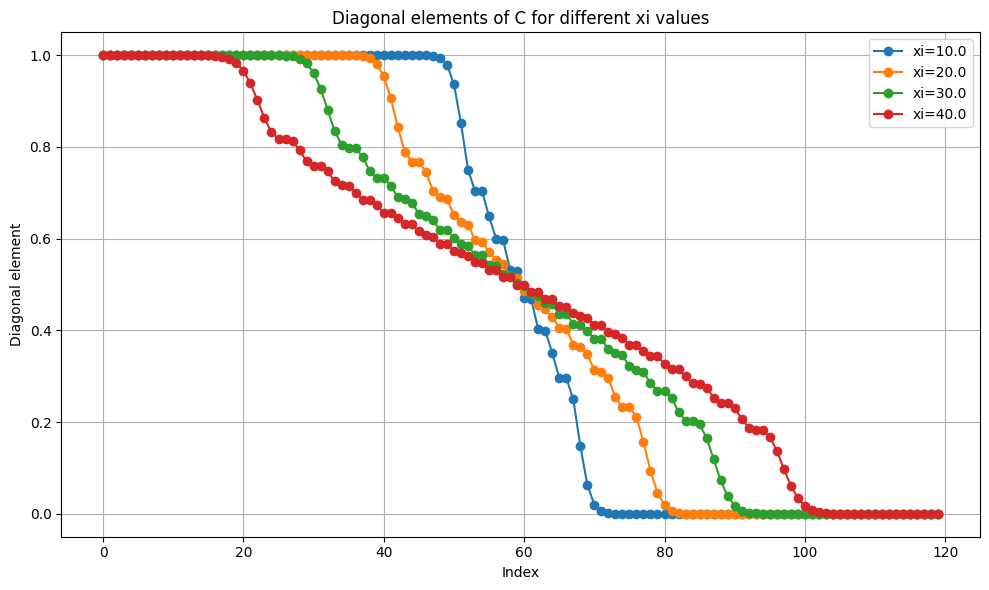

Absolute eigenvalues of C (sorted):
1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
1.00000000000000000000000000000000000000000000

In [ ]:
from matplotlib import pyplot as plt
C = Corr_mat(L, xi, Nprec=100)
rows, cols = C.rows, C.cols
print(rows, cols)

xi_values = [1.0, 2.0, 3.0, 4.0]
plt.figure(figsize=(10, 6))

for xi_val in xi_values:
    C = Corr_mat(L, mp.mpf(str(xi_val)), Nprec=100)
    diag_C = [C[i,i] for i in range(2*L)]
    plt.plot(np.arange(2 * L), diag_C, marker='o', linestyle='-', label=f'xi={xi_val}')

plt.xlabel('Index')
plt.ylabel('Diagonal element')
plt.title('Diagonal elements of C for different xi values')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
evals_C, evecs_C = Corr_eigensystem(C, Nprec=100)
abs_evals = [mp.fabs(ev) for ev in evals_C]
abs_evals_sorted = sorted(abs_evals, reverse=True)
print("Absolute eigenvalues of C (sorted):")
for v in abs_evals_sorted:
    print(v)

20 20


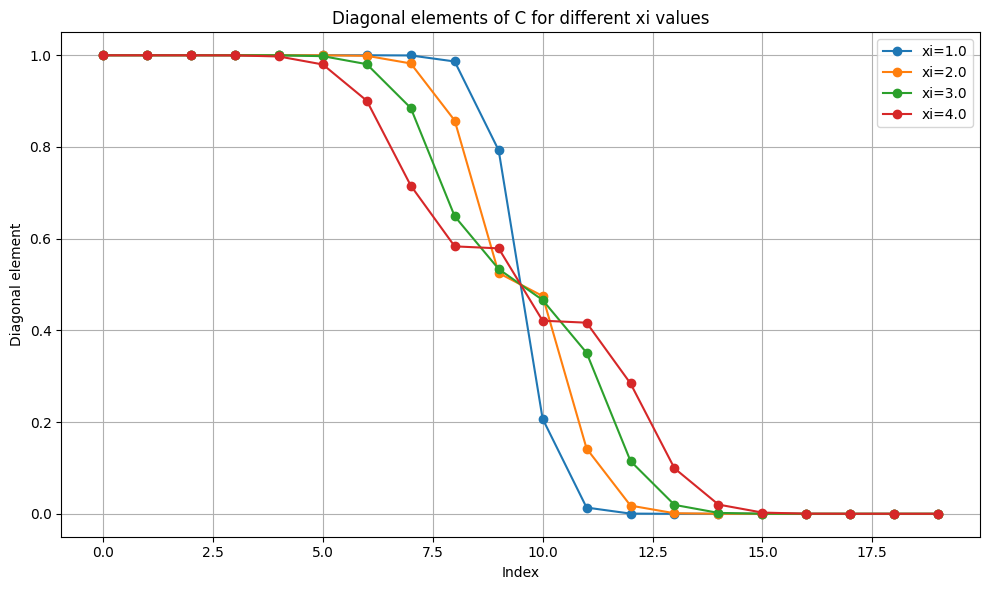

Absolute eigenvalues of C (sorted):
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999
0.9999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999998
9.432303179633907197027382453985863260821305139187169803897425563230780374895113365155888652892376595e-102
7.796172492233945384536076906552274434523009553041654895654313511762330273273619834746190457892021922e-102
7.796172492233945384536076906552274434523009553041654895654313511762330273273619834746190457892021921e-102
7.625648109783949285573291438579174569140545174847168468506025889416207531598935469875393734271508703e-102
4.884427189714145637524534699165370106121265075457601342998397824587869040645551417266290020632632549e-102
3.699422145870655840969965824601381260697949442519508548799983116497392642328576054445166186598460669e-102
3.6994221458706558409699658246013812606979494425195085487999831164973926423285760544

In [114]:
from matplotlib import pyplot as plt
C = Corr_mat(L, xi, Nprec=100)
rows, cols = C.rows, C.cols
print(rows, cols)

xi_values = [1.0, 2.0, 3.0, 4.0]
plt.figure(figsize=(10, 6))

for xi_val in xi_values:
    C = Corr_mat(L, mp.mpf(str(xi_val)), Nprec=100)
    diag_C = [C[i,i] for i in range(2*L)]
    plt.plot(np.arange(2 * L), diag_C, marker='o', linestyle='-', label=f'xi={xi_val}')

plt.xlabel('Index')
plt.ylabel('Diagonal element')
plt.title('Diagonal elements of C for different xi values')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
evals_C, evecs_C = Corr_eigensystem(C, Nprec=100)
abs_evals = [mp.fabs(ev) for ev in evals_C]
abs_evals_sorted = sorted(abs_evals, reverse=True)
print("Absolute eigenvalues of C (sorted):")
for v in abs_evals_sorted:
    print(v)

In [121]:
def red_corr_mat(L, xi, Nprec=200):
    l = L // 2
    CA = Corr_mat(L, xi, Nprec)
    CA_red =  mp.zeros(l, l)
    for i in range(l):
        for j in range(l):
            CA_red[i,j] = CA[i + l,j + l]
    return CA_red


In [123]:
def corr_mat_x0(L, xi, x0, Nprec = 200):
    mp.mp.dps = Nprec

    Corrtot = Corr_mat(L, xi, Nprec)
    l = L // 2

    if x0 >= 0:
        L = l - x0
    else:
        L = l + abs(x0)

    C = mp.zeros(L, L)
    for i in range(L):
        for j in range(L):
            C[i,j] = Corrtot[i + l + 2*x0, j + l + 2*x0]
    return C

In [125]:
x0_values = [-5, -3, 0, 3, 5]  # Example x0 values
for x0 in x0_values:
    print(f"x0 = {x0}")
    C_x0 = corr_mat_x0(L, xi, x0, Nprec=200)
    pprint(C_x0)
    print()

x0 = -5
matrix(
[['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0', '0.0', '0.0', '0.65284596585585964198198910333047442234952101447842681545636549718638066079862902579709793422944928590492840101616193671478975790434755120204622444596784909819754424910578648376874722559986619866362077', '0.39022362668883089866861521463476063699337407669787682715628010416327714358462999483389858544793170150127334062054963417027061456961496061076498333161033508172335639939640750846693710621111654285911688', '-0.1308071322092236104569798934752321662364524267324057221659140277951217524785109359588950333457881044950601849817711444793317664247025465054313674490522015475502653485

In [122]:
print (red_corr_mat(L, xi, Nprec=200))

[  0.51252160894500599963468329502062570697719903481169858443644670516959891018341959264114222273655028504058633998200081276964021438199737049035329049525808513629978739751916066024361941122508036637024054    0.33721724531105364355951489116081259948957670860758528658321049539111765004096583318649801726067605818909617547258206780326639439599087140504778961840819614415676923360052189434722424878125365252735134    -0.01010219827643294125947338872366043645923663265558983523405943917518304105122684669005053445153614063326773374249519171085202328397422784773601395602466142344460359979672875987067540093109496764547501     -0.125020262077626219607533038407109410165626188898616214653992893491539827802512850377281926522204420217534261521510750999848929323601411698066714219484291630175475566784711527541154595639732780150035   0.004986913195610950223322066980845428424561069553174339967434665921500762688323071027088997726430819331474020390321383709647074793940575929999406199622912209568010256121306

In [126]:
Nprec = 200
#evals_precise, evecs_precise = Eigensystem_corr(L, xi, Nprec)

In [128]:
def Corr_mat(L, xi, Nprec=200):
    mp.mp.dps = Nprec

    # Get eigenvalues and eigenvectors
    evals_precise, evecs_precise = Eigensystem_precise(L, xi, Nprec)

    # --- FIX HERE: convert eigenvectors to list-of-lists if needed ---
    if hasattr(evecs_precise, "__getitem__") and not isinstance(evecs_precise[0], list):
        # Assume eigenvectors are columns in a 2L x 2L matrix
        evecs_precise = [
            [evecs_precise[i, j] for i in range(2*L)]
            for j in range(2*L)
        ]
    # ----------------------------------------------------------------

    # Indices of negative eigenvalues
    neg_idx = [k for k, v in enumerate(evals_precise) if v < 0]

    # Initialize C
    C = [[mp.mpf('0') for _ in range(2*L)] for _ in range(2*L)]

    for i in range(2*L):
        for j in range(2*L):
            s = mp.mpf('0')
            for k in neg_idx:
                s += evecs_precise[k][i] * evecs_precise[k][j]
            C[i][j] = s

    return C


In [129]:
pprint(Hamilton_buildtwo(10,5.0))
pprint(Hamilton_build(10,5.0))

array([[-1.9, -0.5, -0. , -0. , -0. , -0. , -0. , -0. , -0. ,  0. , -0. ,
        -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0.5, -1.7, -0.5, -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
        -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0.5, -1.5, -0.5, -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
        -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0. , -0.5, -1.3, -0.5, -0. , -0. , -0. , -0. , -0. , -0. ,
        -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0. , -0. , -0.5, -1.1, -0.5, -0. , -0. , -0. , -0. , -0. ,
        -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0. , -0. , -0. , -0.5, -0.9, -0.5, -0. , -0. , -0. , -0. ,
        -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0. , -0. , -0. , -0. , -0.5, -0.7, -0.5, -0. , -0. , -0. ,
        -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0. , -0. , -0. , -0. , -0.

ValueError: x and y must have same first dimension, but have shapes (20,) and (400, 400)

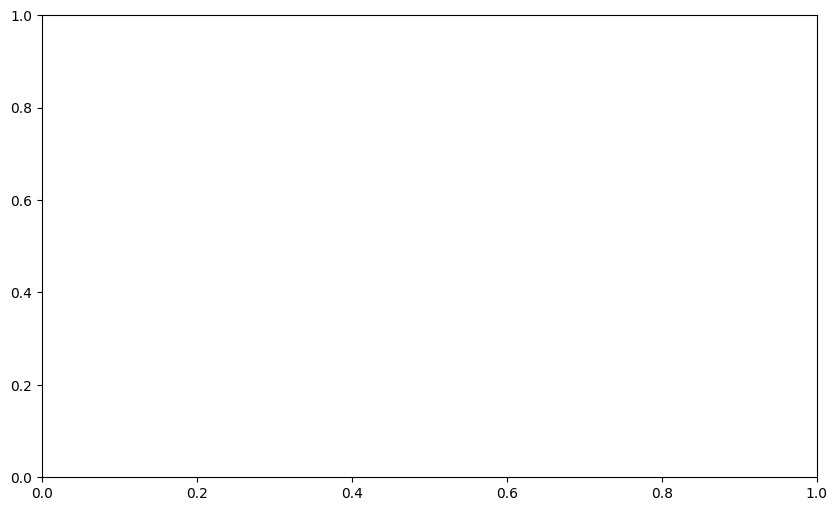

In [130]:

plt.figure(figsize=(10, 6))
plt.plot(np.arange(20), np.diag(Hamilton_build(10, 5.0)), marker='o', linestyle='-')
plt.xticks(ticks=np.arange(20), labels=np.arange(-10 + 1, 10 + 1))
plt.xlabel('Site index')
plt.ylabel('Diagonal element')
plt.title('Hamiltonian diagonal (L=10, xi=5.0)')
plt.grid(True)
plt.tight_layout()
plt.show()
# Compare Hamilton_build for different xi values on the same plot
xi_values = [1, 2, 3]
plt.figure(figsize=(10, 6))

for xi_val in xi_values:
    diag = np.diag(Hamilton_build(10, xi_val))
    plt.plot(np.arange(20), diag, marker='o', linestyle='-', label=f'xi={xi_val}')

plt.xticks(ticks=np.arange(20), labels=np.arange(-10 + 1, 10 + 1))
plt.xlabel('Site index')
plt.ylabel('Diagonal element')
plt.title('Hamiltonian diagonal for different xi values (L=10)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [131]:
# ensure Hamiltonian and eigen computations use double precision (float64)
Hamiltonian = build_hamiltonian(10, np.float128(5.0)).astype(np.float128)  # sparse CSR float64
H_dense = Hamiltonian.toarray().astype(np.float128)  # dense float64 for eigh
pprint(H_dense)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(20), np.diag(H_dense), marker='o', linestyle='-')
plt.xticks(ticks=np.arange(20), labels=np.arange(-10 + 1, 10 + 1))
plt.xlabel('Site index')
plt.ylabel('Diagonal element')
plt.title('Hamiltonian diagonal (L=10, xi=5.0)')
plt.grid(True)
plt.tight_layout()
plt.show()

IndexError: row index (20) out of bounds

In [132]:
# ensure Hamiltonian and eigen computations use double precision (float64)
Hamiltonian = build_hamiltonian(60, np.float64(40.0)).astype(np.float64)  # sparse CSR float64
H_dense = Hamiltonian.toarray().astype(np.float64)  # dense float64 for eigh

evals, evecs = np.linalg.eigh(H_dense)
# order eigenvectors by their corresponding eigenvalues (ascending)
idx = np.argsort(evals)
evals = evals[idx]
evecs = evecs[:, idx]
num_negative_eigvals = np.sum(evals < 0)
print("Number of negative eigenvalues:", num_negative_eigvals)
correlation_mat = np.zeros((evecs.shape[1], evecs.shape[1]), dtype=np.float64)

IndexError: row index (120) out of bounds

In [133]:
idx_sorted = np.argsort(evals)
P_30 = P[:, idx_sorted[:30]]

NameError: name 'evals' is not defined

In [134]:
C = np.zeros((P_30.shape[1], P_30.shape[1]), dtype=np.float64)
for i in range(30):
    for j in range(30):
        C[i,j] = P[i].T@P[j]

print(C)

NameError: name 'P_30' is not defined

In [135]:
#print (build_hamiltonian(60, 40.0))
eigvals_C = np.linalg.eigvalsh(C)
B = (eigvals_C)
print (B)
A = (np.log((1 - B)/B))

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [136]:
import matplotlib.pyplot as plt

L = 60
xi = 30.0
H = build_hamiltonian(L, xi)
diag = H.diagonal()

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(diag)), diag, marker='o', linestyle='-')
plt.xlabel('Site index')
plt.ylabel('Diagonal element')
plt.title(f'Hamiltonian diagonal (L={L}, xi={xi})')
plt.grid(True)
plt.tight_layout()
plt.show()

IndexError: row index (120) out of bounds

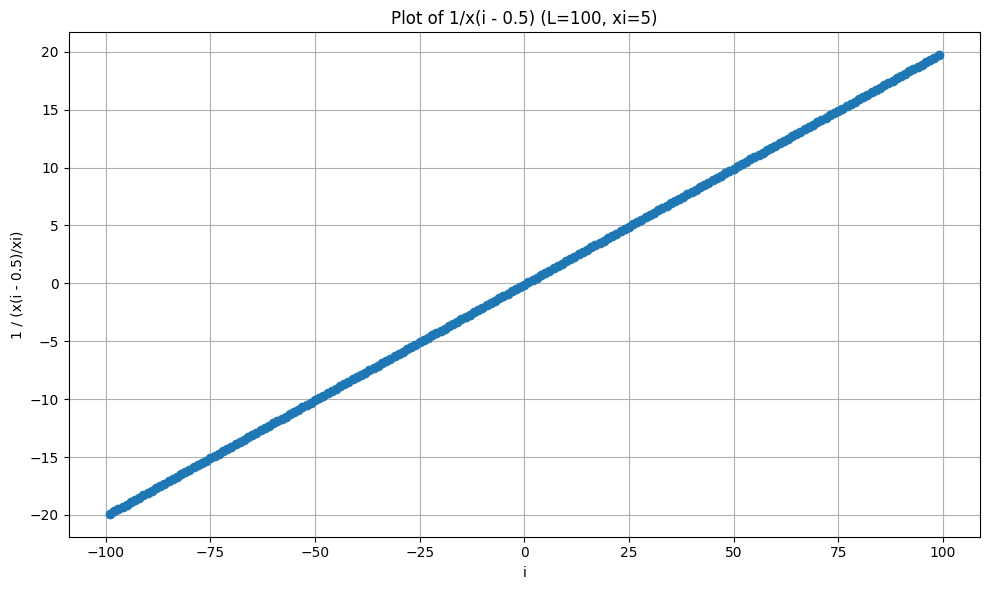

In [137]:
L = 100
xi = 5
x = np.arange(-L + 1, L)
y = 1 / xi * (x - 0.5)

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('i')
plt.ylabel('1 / (x(i - 0.5)/xi)')
plt.title(f'Plot of 1/x(i - 0.5) (L={L}, xi={xi})')
plt.grid(True)
plt.tight_layout()
plt.show()